In [75]:
import numpy as np
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [27]:
X_train = X_train[:10000] / 255
X_train = X_train.reshape((10000, 28, 28, 1))
Y_train = Y_train[:10000]

In [28]:
X_test = X_test[:1000] / 255
X_test = X_test.reshape((1000, 28, 28, 1))
Y_test = Y_test[:1000]

#### Training a model w/o batch normalization

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2359360   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 2,378,826
Trainable params: 2,378,826
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, to_categorical(Y_train),
          batch_size=64,
          epochs=5,
          validation_data=(X_test, to_categorical(Y_test)))


Train on 10000 samples, validate on 1000 samples
Epoch 1/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.3469 - acc: 0.8984 - val_loss: 0.1581 - val_acc: 0.9450
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0880 - acc: 0.9725 - val_loss: 0.0981 - val_acc: 0.9630
Epoch 3/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0458 - acc: 0.9859 - val_loss: 0.1123 - val_acc: 0.9580
Epoch 4/5
10000/10000 [==============================] - 38s 4ms/step - loss: 0.0295 - acc: 0.9908 - val_loss: 0.1051 - val_acc: 0.9690
Epoch 5/5
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0119 - acc: 0.9968 - val_loss: 0.1246 - val_acc: 0.9690


#### Plotting the histogram of a neuron's activations before batch normalization

In [45]:
model.layers

In [84]:
dense_layer = Model(inputs=model.input, outputs=model.layers[-2].output)

In [86]:
# compute activations for a batch of size 128
dense_layer_output = dense_layer.predict(X_test[:128])
dense_layer_output.shape

(128, 64)

(array([50.,  1.,  2.,  1.,  2.,  3.,  4.,  3.,  1.,  3.,  1.,  1.,  1.,
         2.,  1.,  1.,  1.,  3.,  0.,  3.,  4.,  1.,  1.,  0.,  2.,  1.,
         0.,  1.,  4.,  3.,  3.,  1.,  0.,  2.,  1.,  3.,  0.,  2.,  1.,
         2.,  1.,  2.,  2.,  4.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 0.        ,  0.22657202,  0.45314404,  0.67971605,  0.90628807,
         1.13286009,  1.35943211,  1.58600412,  1.81257614,  2.03914816,
         2.26572018,  2.49229219,  2.71886421,  2.94543623,  3.17200825,
         3.39858027,  3.62515228,  3.8517243 ,  4.07829632,  4.30486834,
         4.53144035,  4.75801237,  4.98458439,  5.21115641,  5.43772842,
         5.66430044,  5.89087246,  6.11744448,  6.34401649,  6.57058851,
         6.79716053,  7.02373255,  7.25030457,  7.47687658,  7.7034486 ,
         7.93002062,  8.15659264,  8.38316465,  8.60973667,  8.83630869,
         9.06288071,  9.28945272,  9.51602474,  9.74259676,  9.96916878,
        10.1957408 , 10.42231281, 10.64888483, 10.87545685,

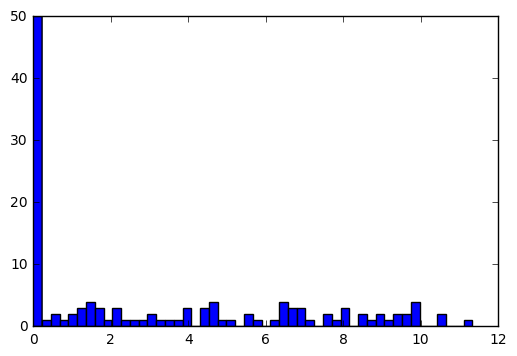

In [89]:
# plot the histogram for one of the neurons
plt.hist(dense_layer_output[:, 0], bins=50)

(array([50.,  1.,  2.,  1.,  2.,  3.,  4.,  3.,  1.,  3.,  1.,  1.,  1.,
         2.,  1.,  1.,  1.,  3.,  0.,  3.,  4.,  1.,  1.,  0.,  2.,  1.,
         0.,  1.,  4.,  3.,  3.,  1.,  0.,  2.,  1.,  3.,  0.,  2.,  1.,
         2.,  1.,  2.,  2.,  4.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([-0.91206974, -0.84794761, -0.78382548, -0.71970336, -0.65558123,
        -0.5914591 , -0.52733697, -0.46321485, -0.39909272, -0.33497059,
        -0.27084846, -0.20672634, -0.14260421, -0.07848208, -0.01435996,
         0.04976217,  0.1138843 ,  0.17800643,  0.24212855,  0.30625068,
         0.37037281,  0.43449494,  0.49861706,  0.56273919,  0.62686132,
         0.69098344,  0.75510557,  0.8192277 ,  0.88334983,  0.94747195,
         1.01159408,  1.07571621,  1.13983834,  1.20396046,  1.26808259,
         1.33220472,  1.39632684,  1.46044897,  1.5245711 ,  1.58869323,
         1.65281535,  1.71693748,  1.78105961,  1.84518174,  1.90930386,
         1.97342599,  2.03754812,  2.10167024,  2.16579237,

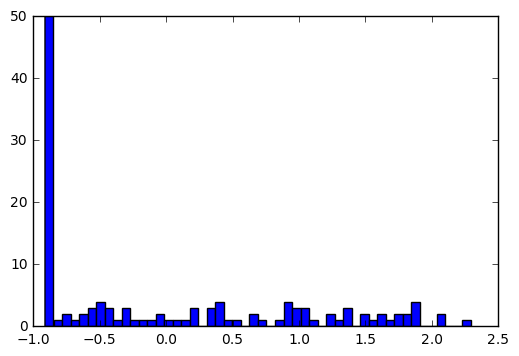

In [101]:
m = dense_layer_output[:, 0].mean()
s = dense_layer_output[:, 0].std()
plt.hist((dense_layer_output[:, 0] - m) / s, bins=50)

#### Applying Batch Normalization to the Network's Layers

In [76]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

In [77]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2359360   
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
__________

In [79]:
model2.fit(X_train, to_categorical(Y_train),
          batch_size=64,
          epochs=5,
          validation_data=(X_test, to_categorical(Y_test)))


Train on 10000 samples, validate on 1000 samples
Epoch 1/5
10000/10000 [==============================] - 142s 14ms/step - loss: 0.2908 - acc: 0.9170 - val_loss: 0.1569 - val_acc: 0.9620
Epoch 2/5
10000/10000 [==============================] - 149s 15ms/step - loss: 0.0745 - acc: 0.9818 - val_loss: 0.1128 - val_acc: 0.9640
Epoch 3/5
10000/10000 [==============================] - 149s 15ms/step - loss: 0.0295 - acc: 0.9945 - val_loss: 0.0799 - val_acc: 0.9710
Epoch 4/5
10000/10000 [==============================] - 132s 13ms/step - loss: 0.0192 - acc: 0.9964 - val_loss: 0.0932 - val_acc: 0.9690
Epoch 5/5
10000/10000 [==============================] - 131s 13ms/step - loss: 0.0080 - acc: 0.9988 - val_loss: 0.0835 - val_acc: 0.9690


While batch normalization slightly increased the number of trainable params, it also clearly speeded up the network's training: with it, only 2 epochs were needed to match the accuracy score obtained by the network trained 5 epochs w/o batch normalization.

#### Plotting the histogram of a neuron's activations after normalization

In [91]:
model2.layers

In [93]:
batch_norm_layer = Model(inputs=model2.input, outputs=model2.layers[-2].output)

In [95]:
# compute activations for a batch of size 128
bnorm_layer_output = batch_norm_layer.predict(X_test[:128])
bnorm_layer_output.shape

(128, 64)

(array([54.,  2.,  0.,  2.,  2.,  0.,  3.,  2.,  1.,  2.,  0.,  1.,  2.,
         1.,  4.,  3.,  3.,  0.,  5.,  4.,  2.,  0.,  2.,  1.,  1.,  2.,
         1.,  0.,  1.,  1.,  1.,  3.,  1.,  4.,  3.,  1.,  4.,  3.,  3.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.04833174, -0.97165818, -0.89498463, -0.81831107, -0.74163752,
        -0.66496396, -0.58829041, -0.51161685, -0.43494329, -0.35826974,
        -0.28159618, -0.20492263, -0.12824907, -0.05157552,  0.02509804,
         0.10177159,  0.17844515,  0.2551187 ,  0.33179226,  0.40846581,
         0.48513937,  0.56181293,  0.63848648,  0.71516004,  0.79183359,
         0.86850715,  0.9451807 ,  1.02185426,  1.09852781,  1.17520137,
         1.25187492,  1.32854848,  1.40522203,  1.48189559,  1.55856915,
         1.6352427 ,  1.71191626,  1.78858981,  1.86526337,  1.94193692,
         2.01861048,  2.09528403,  2.17195759,  2.24863114,  2.3253047 ,
         2.40197825,  2.47865181,  2.55532537,  2.63199892,

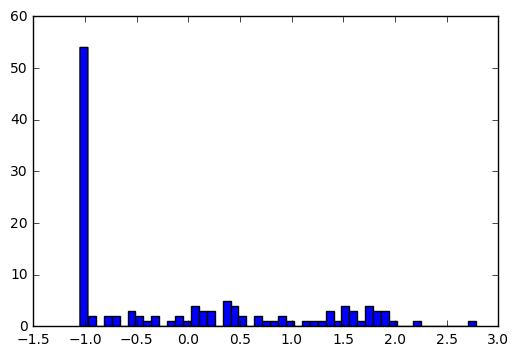

In [100]:
# plot the histogram for one of the neurons
plt.hist(bnorm_layer_output[:, 0], bins=50)